Shape of dataset: (10000, 19)

First 5 rows:
        id    age  gender      race driving_experience    education  \
0  569520    65+  female  majority               0-9y  high school   
1  750365  16-25    male  majority               0-9y         none   
2  199901  16-25  female  majority               0-9y  high school   
3  478866  16-25    male  majority               0-9y   university   
4  731664  26-39    male  majority             10-19y         none   

          income  credit_score  vehicle_ownership vehicle_year  married  \
0    upper class      0.629027               True   after 2015    False   
1        poverty      0.357757              False  before 2015    False   
2  working class      0.493146               True  before 2015    False   
3  working class      0.206013               True  before 2015    False   
4  working class      0.388366               True  before 2015    False   

   children  postal_code  annual_mileage vehicle_type  speeding_violations  \
0   

/tmp/ipython-input-1238095068.py:40: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["annual_mileage"].fillna(df["annual_mileage"].mean(), inplace=True)


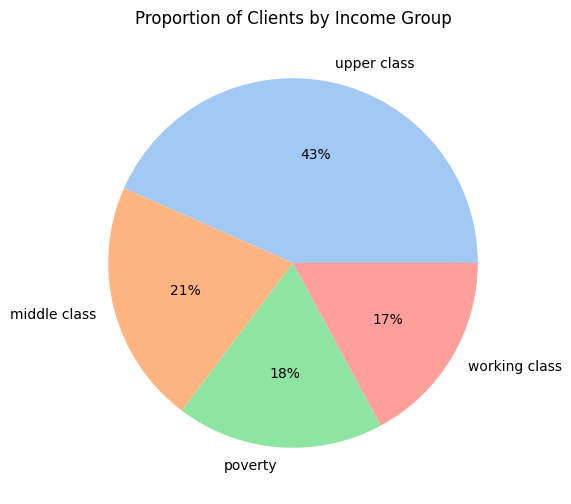

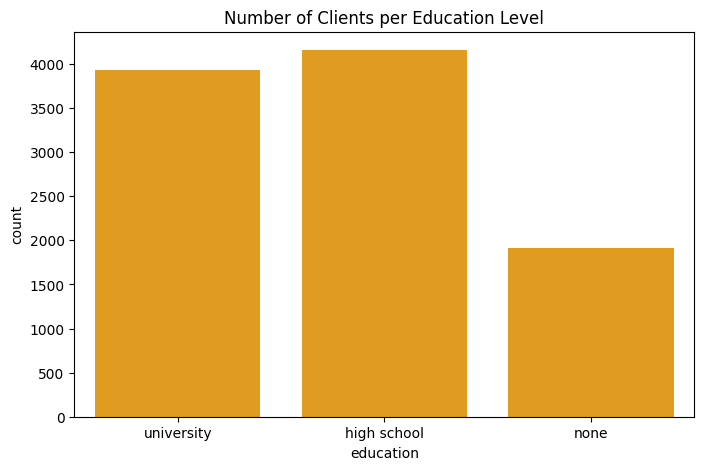

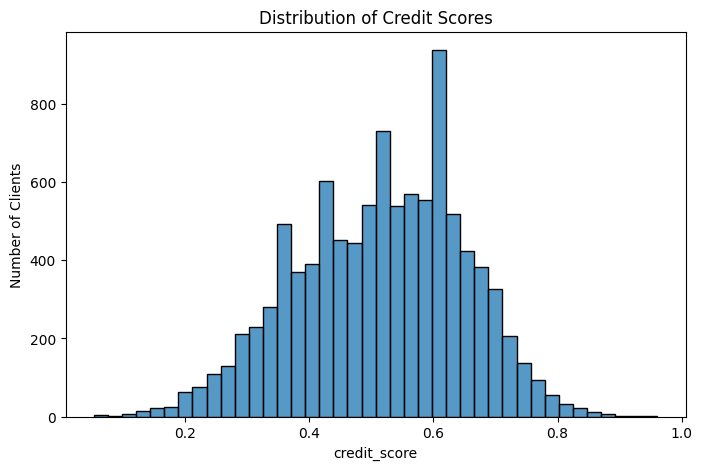

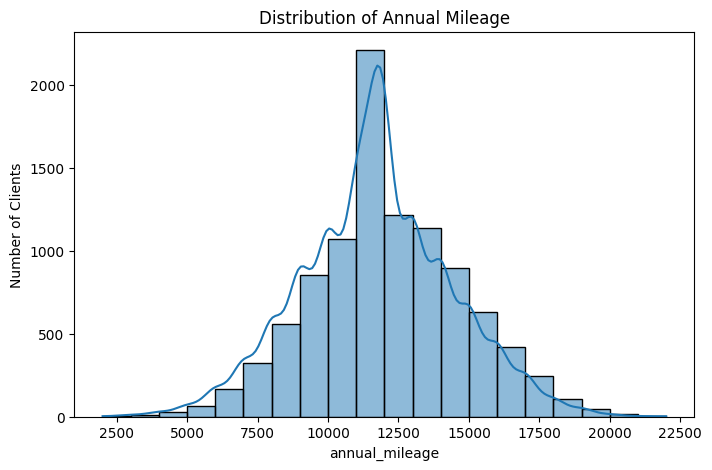

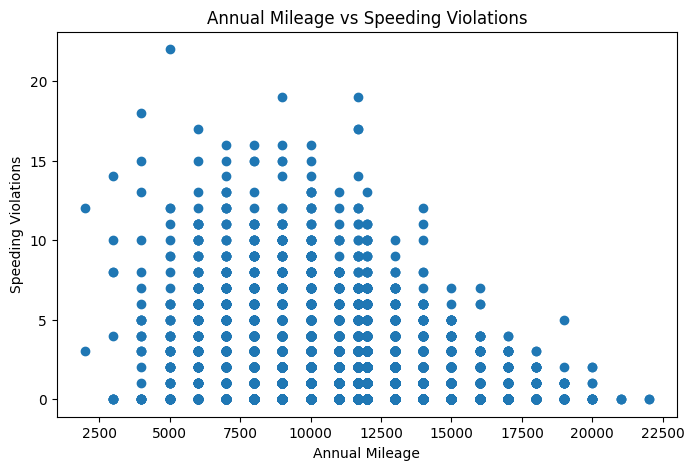

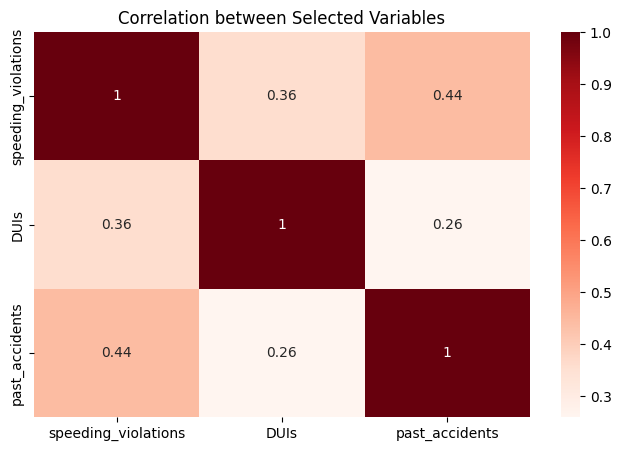

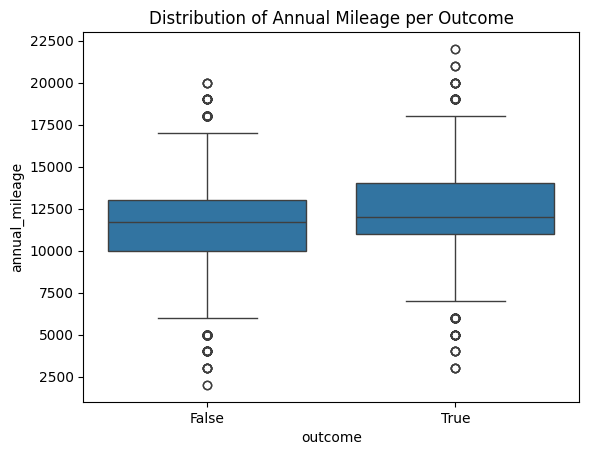

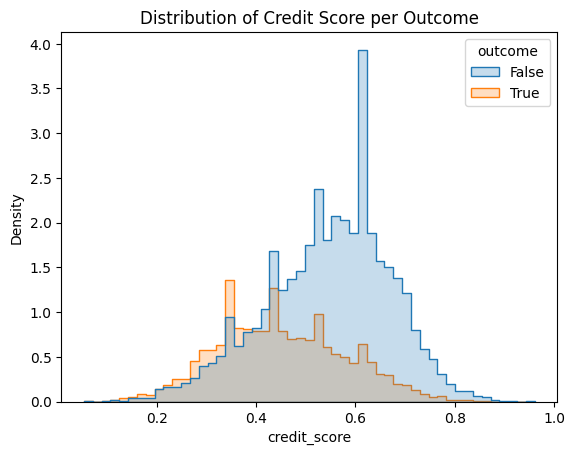


Claim Rate Counts:
 claim_rate
0    6867
1    3133
Name: count, dtype: int64


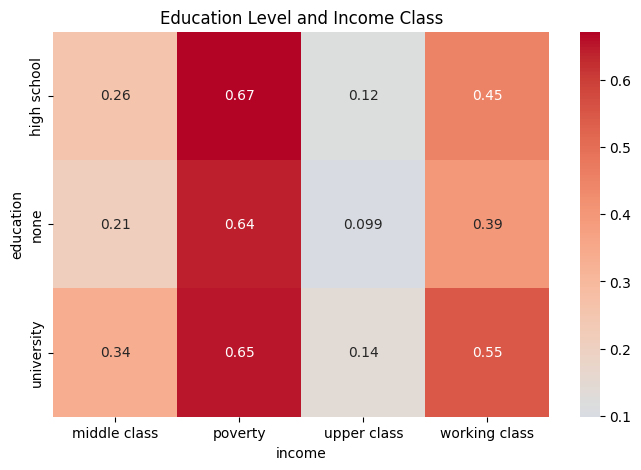

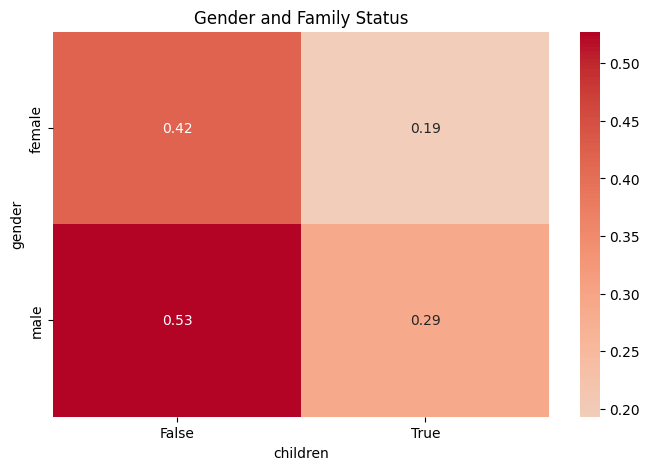

In [2]:
# =========================
# 📌 Importing Libraries
# =========================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# =========================
# 📌 Load and Inspect Data
# =========================
df = pd.read_csv("https://raw.githubusercontent.com/siglimumuni/Datasets/master/customer-data.csv")

print("Shape of dataset:", df.shape)
print("\nFirst 5 rows:\n", df.head())
print("\nDataset Info:\n")
print(df.info())

# =========================
# 📌 Data Cleaning - Missing Values
# =========================
# Check missing values
print("\nMissing Values:\n", df.isna().sum())

# Mean credit score per income group
print("\nMean credit score per income group:\n", df.groupby("income")["credit_score"].mean())

# Function to impute credit score
def impute_creditscore(income_classes):
    """Fill missing credit scores with mean per income group."""
    for income_class in income_classes:
        mask = df["income"] == income_class
        mean = df[df["income"] == income_class]["credit_score"].mean()
        df.loc[mask, "credit_score"] = df.loc[mask, "credit_score"].fillna(mean)

income_groups = ["poverty", "upper class", "middle class", "working class"]
impute_creditscore(income_groups)

# Fill missing annual mileage with overall mean
df["annual_mileage"].fillna(df["annual_mileage"].mean(), inplace=True)

# Drop unnecessary columns
df.drop(["id", "postal_code"], axis=1, inplace=True)

print("\nMissing Values after cleaning:\n", df.isna().sum())

# =========================
# 📌 Descriptive Statistics
# =========================
print("\nStatistical Summary:\n", df.describe().T)

# =========================
# 📊 Univariate Analysis
# =========================
plt.figure(figsize=[6,6])
data = df["income"].value_counts(normalize=True)
labels = ["upper class", "middle class", "poverty", "working class"]
colors = sns.color_palette("pastel")
plt.pie(data, labels=labels, colors=colors, autopct="%.0f%%")
plt.title("Proportion of Clients by Income Group")
plt.show()

plt.figure(figsize=[8,5])
sns.countplot(data=df, x="education", order=["university", "high school", "none"], color="orange")
plt.title("Number of Clients per Education Level")
plt.show()

plt.figure(figsize=[8,5])
sns.histplot(data=df, x="credit_score", bins=40)
plt.title("Distribution of Credit Scores")
plt.ylabel("Number of Clients")
plt.show()

plt.figure(figsize=[8,5])
sns.histplot(data=df, x="annual_mileage", bins=20, kde=True)
plt.title("Distribution of Annual Mileage")
plt.ylabel("Number of Clients")
plt.show()

# =========================
# 📊 Bivariate Analysis
# =========================
plt.figure(figsize=[8,5])
plt.scatter(data=df, x="annual_mileage", y="speeding_violations")
plt.title("Annual Mileage vs Speeding Violations")
plt.xlabel("Annual Mileage")
plt.ylabel("Speeding Violations")
plt.show()

# Correlation Heatmap
corr_matrix = df[["speeding_violations", "DUIs", "past_accidents"]].corr()
plt.figure(figsize=[8,5])
sns.heatmap(corr_matrix, annot=True, cmap="Reds")
plt.title("Correlation between Selected Variables")
plt.show()

# Outcome vs Mileage
sns.boxplot(data=df, x="outcome", y="annual_mileage")
plt.title("Distribution of Annual Mileage per Outcome")
plt.show()

sns.histplot(df, x="credit_score", hue="outcome", element="step", stat="density")
plt.title("Distribution of Credit Score per Outcome")
plt.show()

# =========================
# 📊 Multivariate Analysis
# =========================
# Claim Rate column
df["claim_rate"] = np.where(df["outcome"] == True, 1, 0)
print("\nClaim Rate Counts:\n", df["claim_rate"].value_counts())

# Education vs Income vs Claim Rate
edu_income = pd.pivot_table(df, index="education", columns="income", values="claim_rate", aggfunc="mean")
plt.figure(figsize=[8,5])
sns.heatmap(edu_income, annot=True, cmap="coolwarm", center=0.117)
plt.title("Education Level and Income Class")
plt.show()

# Gender vs Children vs Claim Rate
gender_children = pd.pivot_table(df, index="gender", columns="children", values="claim_rate")
plt.figure(figsize=[8,5])
sns.heatmap(gender_children, annot=True, cmap="coolwarm", center=0.117)
plt.title("Gender and Family Status")
plt.show()
